<a href="https://colab.research.google.com/github/vadim13213/practice/blob/main/%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82%D0%BD%D0%BE%D0%B5_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Расчестное задание №1. Вариант 4. Захаренко Вадим 2021-ФГиИБ-ПИ-1б

Параметры, необходимые для расчета (варинат 12):


*   Класс 1: P1 = 0.2, m1 = 8, d1 = 2
*   Класс 2: P2 = 0.4, m2 = 12, d1 = 1
*   Класс 3: P3 = 0.4, m3 = 17, d3 = 3


# Выполнение работы.

# 1. Найти все разделяющие точки для пар K1-K2, K1-K3, K2-K3.

Для начала необходимо определить функции правдоподобия для каждого класса. Функция правдоподобия для нормально распределённой случайной величины выражается через её плотность вероятности, умноженную на априорную вероятность класса. Для нормального распределения с параметрами $m$ (среднее значение) и $d$ (стандартное отклонение) функция плотности вероятности $f(x)$ имеет вид:

$f(x) = \frac{1}{\sqrt{2\pi} d} e^{-\frac{(x-m)^2}{2d^2}}$

Тогда функция правдоподобия для класса $i$ будет:

$P_i(x) = P_i \cdot \frac{1}{\sqrt{2\pi} d_i} e^{-\frac{(x-m_i)^2}{2d_i^2}}$

Чтобы найти разделяющие точки между классами, нужно решить уравнение, приравнивая функции правдоподобия двух классов. Например, для точек между классами 1 и 2 уравнение будет:

$P_1 \cdot \frac{1}{\sqrt{2\pi} d_1} e^{-\frac{(x-m_1)^2}{2d_1^2}} = P_2 \cdot \frac{1}{\sqrt{2\pi} d_2} e^{-\frac{(x-m_2)^2}{2d_2^2}}$

После логарифмирования и упрощения получится квадратное уравнение относительно $x$, которое можно решить для нахождения разделяющих точек. Аналогично поступаем для классов 2 и 3.

Приступим к нахождению разделяющих точек.

Для этого будем использовать Python, библиотеку Scipy. Из библиотеки Scipy будем использовать функцию fsolve, которая позволяет решать системы нелинейных уравнений численно.

# Старый варинат нахождения разделяющих точек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

P1, m1, d1 = 0.2, 8, 2
P2, m2, d2 = 0.4, 12, 1
P3, m3, d3 = 0.4, 17, 3

# Функция правдоподобия для нормального распределения
def likelihood(x, P, m, d):
    return P * norm.pdf(x, m, d)

# Функции правдоподобия для каждого класса
def likelihood_class_1(x):
    return likelihood(x, P1, m1, d1)

def likelihood_class_2(x):
    return likelihood(x, P2, m2, d2)

def likelihood_class_3(x):
    return likelihood(x, P3, m3, d3)

# Находим разделяющие точки между классами 1 и 2 аналитически
def find_intersections_1_2():
    a = 1 / (2 * d1**2) - 1 / (2 * d2**2)
    b = m2 / (d2**2) - m1 / (d1**2)
    c = (m1**2) / (2 * d1**2) - (m2**2) / (2 * d2**2) - np.log(d2 / d1) + np.log(P2 / P1)
    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return []  # нет пересечений

    sqrt_discriminant = np.sqrt(discriminant)
    root1 = (-b + sqrt_discriminant) / (2 * a)
    root2 = (-b - sqrt_discriminant) / (2 * a)

    return [root for root in [root1, root2] if 0 <= root < np.inf]

# Находим разделяющие точки между классами 1 и 3 методом численного решения уравнений
def find_intersection_class_1_3():
    def equation(x):
        return likelihood_class_1(x) - likelihood_class_3(x)

    # Начальное приближение для поиска корня
    initial_guess = (m1 + m3) / 2

    # Используем fsolve для численного решения уравнения
    intersection = fsolve(equation, initial_guess)

    return intersection[0]  # Возвращаем первый корень

# Находим разделяющие точки между классами 2 и 3 аналитически (используем ту же функцию, что и для 1 и 2)
intersection_2_3 = find_intersections_1_2()

# Находим все разделяющие точки
intersection_1_2 = find_intersections_1_2()
intersection_1_3 = find_intersection_class_1_3()

print('Разделяющие точки между классами 1 и 2:', intersection_1_2)
print('Разделяющие точки между классами 1 и 3:', intersection_1_3)
print('Разделяющие точки между классами 2 и 3:', intersection_2_3)


Разделяющие точки между классами 1 и 2: [10.04579685838777, 16.620869808278897]
Разделяющие точки между классами 1 и 3: 11.406478122199399
Разделяющие точки между классами 2 и 3: [10.04579685838777, 16.620869808278897]


# Новый варинат

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

P1, m1, d1 = 0.2, 8, 2
P2, m2, d2 = 0.4, 12, 1
P3, m3, d3 = 0.4, 17, 3

# Функция правдоподобия для нормального распределения
def likelihood(x, P, m, d):
    return P * norm.pdf(x, m, d)

# Функции правдоподобия для каждого класса
def likelihood_class_1(x):
    return likelihood(x, P1, m1, d1)

def likelihood_class_2(x):
    return likelihood(x, P2, m2, d2)

def likelihood_class_3(x):
    return likelihood(x, P3, m3, d3)

# Находим разделяющие точки между классами аналитически
def find_intersections(P1, m1, d1, P2, m2, d2):
    a = 1 / (2 * d1**2) - 1 / (2 * d2**2)
    b = m2 / (d2**2) - m1 / (d1**2)
    c = (m1**2) / (2 * d1**2) - (m2**2) / (2 * d2**2) - np.log(d2 / d1) + np.log(P2 / P1)
    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return []  # нет пересечений

    sqrt_discriminant = np.sqrt(discriminant)
    root1 = (-b + sqrt_discriminant) / (2 * a)
    root2 = (-b - sqrt_discriminant) / (2 * a)

    return [root for root in [root1, root2] if 0 <= root < np.inf]

# Находим все разделяющие точки
intersection_1_2 = find_intersections(P1, m1, d1, P2, m2, d2)
intersection_1_3 = find_intersections(P1, m1, d1, P3, m3, d3)
intersection_2_3 = find_intersections(P2, m2, d2, P3, m3, d3)

print('Разделяющие точки между классами 1 и 2:', intersection_1_2)
print('Разделяющие точки между классами 1 и 3:', intersection_1_3)
print('Разделяющие точки между классами 2 и 3:', intersection_2_3)

Разделяющие точки между классами 1 и 2: [10.04579685838777, 16.620869808278897]
Разделяющие точки между классами 1 и 3: [11.406478122199394]
Разделяющие точки между классами 2 и 3: [13.8219374020402, 8.9280625979598]


Исходя из полученных данных, можно установить, что:

* Для значений $x<10.04$, класс 1 имеет наибольшую функцию правдоподобия.
* Для значений $13.16≤x<16.62$, класс 2 имеет наибольшую функцию правдоподобия.
* Для значений $x≥16.62$, класс 3 имеет наибольшую функцию правдоподобия.

# 2. Построить график функции прадоподобия $P_if(m_i,d_i)$.

Для построяния графика функции правдоподобия также будем использовать Python, но на этот раз библиотеку Matplotlib, предназначенную как раз таки для построения графиков.

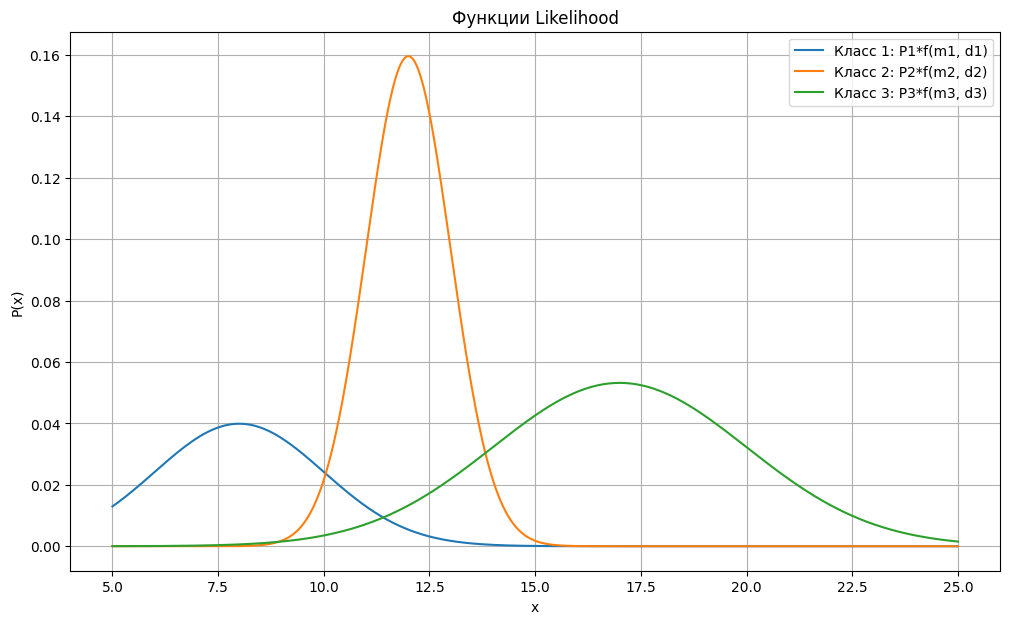

In [ ]:
# Генерируем набор точек для графика
x = np.linspace(5, 25, 1000)

# Вычисляем значения функции правдоподобия для каждого класса
P1_x = likelihood(x, P1, m1, d1)
P2_x = likelihood(x, P2, m2, d2)
P3_x = likelihood(x, P3, m3, d3)

# Строим графики
plt.figure(figsize=(12, 7))

plt.plot(x, P1_x, label='Класс 1: P1*f(m1, d1)')
plt.plot(x, P2_x, label='Класс 2: P2*f(m2, d2)')
plt.plot(x, P3_x, label='Класс 3: P3*f(m3, d3)')

plt.title('Функции Likelihood')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

# 3. Указать на графике все полученные **разделяющие точки**.

Для этого также используем Matplotlib.

По мимо этого можно сразу закрасить области решения для каждого класса, чтобы потом было легче написать ответ.

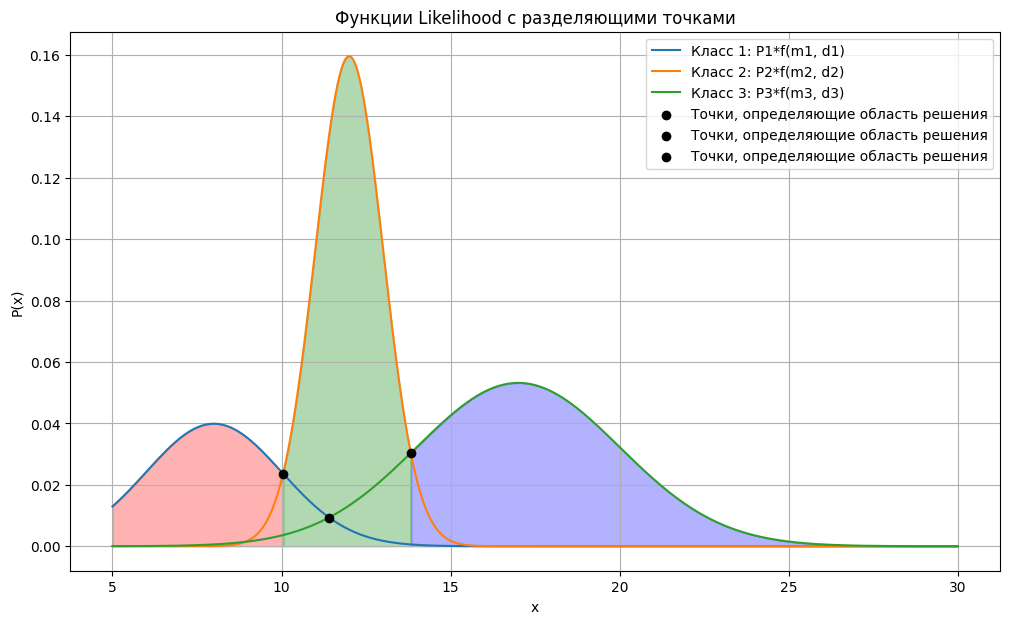

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

P1, m1, d1 = 0.2, 8, 2
P2, m2, d2 = 0.4, 12, 1
P3, m3, d3 = 0.4, 17, 3

intersection_1_2 = find_intersections(P1, m1, d1, P2, m2, d2)
intersection_1_3 = find_intersections(P1, m1, d1, P3, m3, d3)
intersection_2_3 = find_intersections(P2, m2, d2, P3, m3, d3)

def likelihood(x, P, m, d):
    return P * np.exp(-0.5 * ((x - m) / d) ** 2) / (d * np.sqrt(2 * np.pi))

x = np.linspace(5, 30, 1000)

class1_region = x[x < intersection_1_2[0]]
class2_region = x[(x >= intersection_1_2[0]) & (x < intersection_2_3[0])]
class3_region = x[x >= intersection_2_3[0]]

P1_x = likelihood(x, P1, m1, d1)
P2_x = likelihood(x, P2, m2, d2)
P3_x = likelihood(x, P3, m3, d3)

plt.figure(figsize=(12, 7))

plt.plot(x, P1_x, label='Класс 1: P1*f(m1, d1)')
plt.plot(x, P2_x, label='Класс 2: P2*f(m2, d2)')
plt.plot(x, P3_x, label='Класс 3: P3*f(m3, d3)')

plt.fill_between(class1_region, likelihood(class1_region, P1, m1, d1), alpha=0.3, color='red')
plt.fill_between(class2_region, likelihood(class2_region, P2, m2, d2), alpha=0.3, color='green')
plt.fill_between(class3_region, likelihood(class3_region, P3, m3, d3), alpha=0.3, color='blue')

plt.scatter(intersection_1_2[0], likelihood(intersection_1_2[0], P2, m2, d2), color='black', zorder=5, label='Точки, определяющие область решения')
plt.scatter(intersection_1_3[0], likelihood(intersection_1_3[0], P1, m1, d1), color='black', zorder=5, label='Точки, определяющие область решения')
plt.scatter(intersection_2_3[0], likelihood(intersection_2_3[0], P3, m3, d3), color='black', zorder=5, label='Точки, определяющие область решения')

plt.title('Функции Likelihood с разделяющими точками')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)

plt.show()

На графике показаны функции правдоподобия для всех трех классов с закрашенными областями решений:

* Красная область соответствует классу 1 и ограничена справа разделяющей точкой $x≈10.04$.
* Зеленая область соответствует классу 2 и находится между разделяющими точками $x≈10.04$ и $x≈16.62$.
* Синяя область соответствует классу 3 и начинается от разделяющей точки $x≈16.62$.

Черные точки обозначают разделяющие границы между классами (определяют область решений). Выколотые точки не определяют область решений.

# 4. Выбрать точки, соответсвующие границам классов, и записать ответ в виде отрезков (или полуинтервалов), соответсвующих каждому из трех классов.

Исходя из найденных точек разделения и ориентируясь по графику, мы можем определить следующие границы для классов:
* Класс 1:
$(0, 10.04)$ – значения меньше первой разделяющей точки.
* Класс 2:
$[10.04,16.62)$ – значения от первой до второй разделяющей точки.
* Класс 3:
$[16.62,+∞]$ – значения больше второй разделяющей точки.

Эти интервалы представляют собой отрезки или полуинтервалы, на которых классификатор будет принимать решение о принадлежности к определенному классу. Если значение x попадает в один из этих интервалов, то оно классифицируется соответственно.